In [1]:
#importing the required modules

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [18]:
# Load dataset

df = pd.read_csv('spam.csv', encoding='latin-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
# Data preprocessing

df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']

In [4]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Vectorize text

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [6]:
# Training

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    predictions = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[name] = accuracy


In [7]:
#  best model selection

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {accuracies[best_model_name]}")

Best Model: Naive Bayes with accuracy 0.9838565022421525


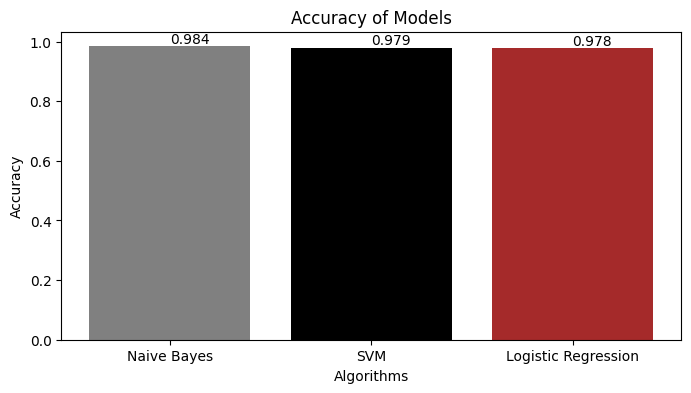

In [8]:
# accuracies interpretation

plt.figure(figsize=(8, 4))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['gray', 'black', 'brown'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom')  # va: vertical alignment

plt.show()

In [9]:
import tkinter as tk
from tkinter import messagebox

In [13]:
def classify_message():
    user_input = entry.get()
    if user_input:
        user_input_vec = vectorizer.transform([user_input])
        prediction = best_model.predict(user_input_vec)
        result = 'Spam' if prediction[0] == 1 else 'Ham( Genuine Msg )'
        result_label.config(text=f"The message is classified as: {result}", fg='white')
    else:
        result_label.config(text="Please enter a message to classify.", fg='red')



In [16]:

# Create the UI with the requirements

root = tk.Tk()
root.title("Spam SMS Detection")
root.configure(bg='black')

frame = tk.Frame(root, bg='black')
frame.pack(pady=20)

label = tk.Label(frame, text="Enter SMS:", bg='black', fg='white', font=('Helvetica', 14, 'bold'))
label.pack(side=tk.LEFT)

entry = tk.Entry(frame, width=50, bg='gray', fg='white', font=('Helvetica', 12))
entry.pack(side=tk.LEFT, padx=10)

button = tk.Button(root, text="Classify", command=classify_message, bg='black', fg='white', font=('Helvetica', 12, 'bold'))
button.pack(pady=20)

result_label = tk.Label(root, text="", bg='black', fg='white', font=('Helvetica', 14, 'bold'))
result_label.pack()

root.mainloop()
